_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 7.4MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 17:21:54--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 17:21:54 (141 MB/s) - ‘misleading.py’ saved [1641/1641]



#### Fix misleading plot #1

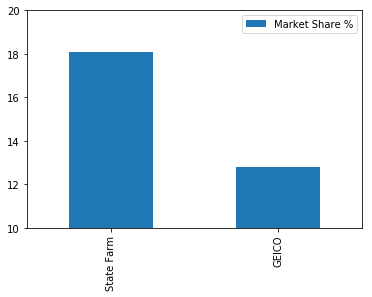

In [170]:
# Since y-axis origin is at 10 bars are taller than they should
misleading.plot1();

In [0]:
misleading.plot1??
#this shows code for plot1 in 'misleading' file
'''
Signature: misleading.plot1()
Source:   
def plot1():
    return insurance.plot.bar(ylim=(10, 20)) # <-- y limit is from 10 to 20
File:      /content/misleading.py
Type:      function
'''

In [177]:
# The bar for State Farm should be 1.4 times taller than Geico's
# Yet it seems to taller than that
18.07 / 12.79

1.4128225175918687

In [178]:
# It's actually about 3 times taller in misleading plot1
(18.07 - 10) / (12.79- 10)

2.892473118279571

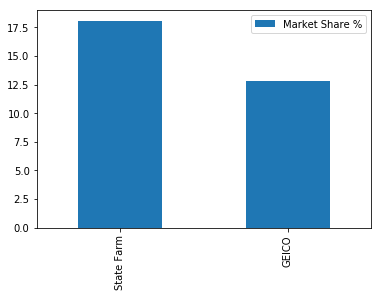

In [179]:
# ylim(10, 20) needs to be removed in plot settings to fix bar heights
insurance = pd.DataFrame(
            index=['State Farm', 'GEICO'],
            data={'Market Share %':[18.07, 12.79]})

insurance.plot.bar();

#### Fix misleading plot #2

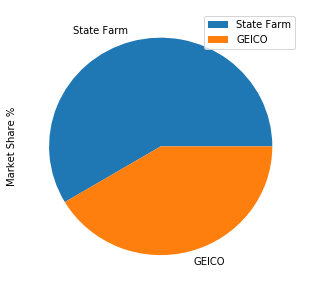

In [181]:
misleading.plot2();

In [184]:
# Here, the chart only includes State Farm and GEICO as insurance co. in market
# Thus, the pie does not add up to 100%
# Pie's categories should be "mutually exclusive, collectively exhaustive"
# Add "other" category to the dataframe

other = pd.DataFrame(
        index=['Other'], data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


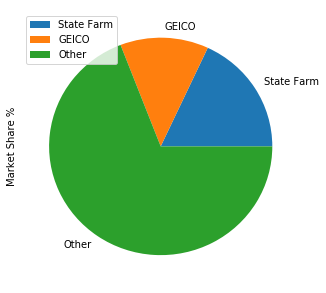

In [186]:
# Now the market share distribution looks a lot different
insurance.plot.pie('Market Share %', figsize=(5, 5));

#### Fix misleading plot #3

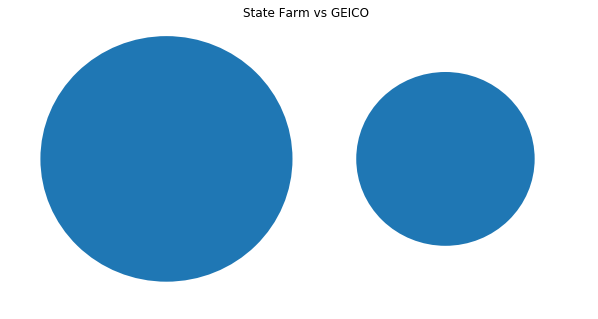

In [10]:
misleading.plot3()

In [0]:
# The problem here is that circles are sized by radius
# circle = plt.Circle(xy=(20, 20), radius=18.07)
# circle = plt.Circle(xy=(60, 20), radius=12.79)
misleading.plot3??

In [189]:
# People perceive size differences by area, not radius
# As seen in calculation below, first circle should appear 1.4x as big as second
18.07 / 12.79

1.4128225175918687

In [191]:
from math import pi
# Yet first circle appears about 2x as big
(pi*18.07**2) / (pi*12.79**2)

1.9960674662146263

In [192]:
# By setting radius to square root of the data, areas will be correctly proportioned
from math import sqrt
sqrt(18.07)**2 / sqrt(12.79)**2

1.4128225175918685

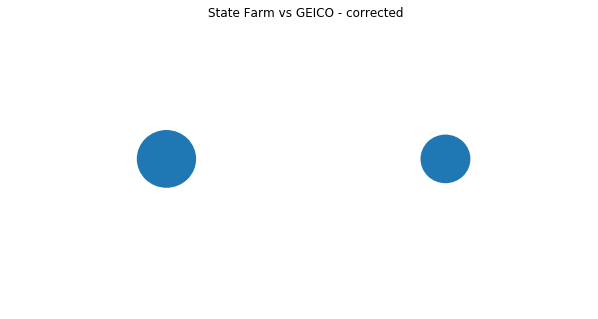

In [193]:
import matplotlib.pyplot as plt

# Code below extracted from misleading.plot3??
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07))
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79))
ax.add_artist(circle)
                    
plt.title('State Farm vs GEICO - corrected')
plt.show();

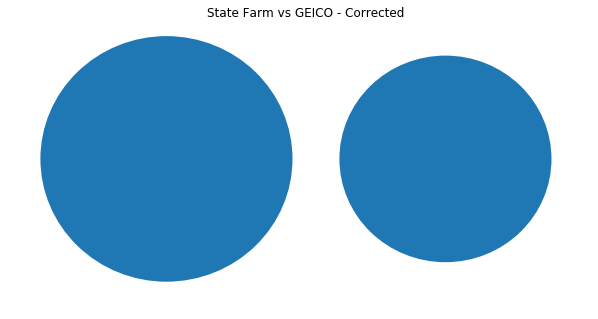

In [194]:
# We should scale the circles by a constant factor
scale = 18.07 / sqrt(18.07)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07)*scale) # scaling by constant 'scale'
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79)*scale) # scaling by constant 'scale'
ax.add_artist(circle)

plt.title('State Farm vs GEICO - Corrected')
plt.show()

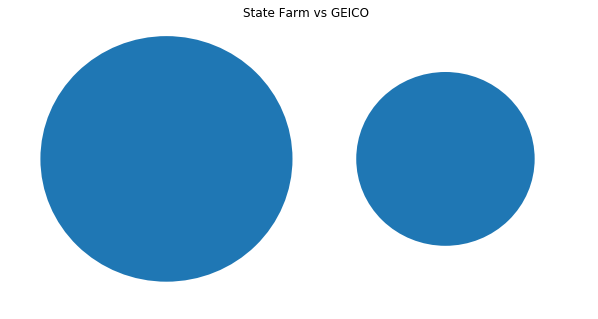

In [195]:
# Compare the corrected with the original
misleading.plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [15]:
misleading.plot4()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
misleading.plot4??

In [18]:
# From example given on misleading.plot4
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

pop_eng_hur = data.population_engineers_hurricanes.url

variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

RepeatChart({
  repeat: Repeat({
    row: ['population', 'engineers', 'hurricanes']
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  spec: Chart({
    data: UrlData({
      format: TopoDataFormat({
        feature: 'states',
        type: 'topojson'
      }),
      url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
    }),
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: RepeatRef({
          repeat: 'row'
        }),
        type: 'quantitative'
      })
    }),
    height: 300,
    mark: 'geoshape',
    projection: Projection({
      type: 'albersUsa'
    }),
    transform: [LookupTransform({
      from: LookupData({
        data: 'https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv',
        fields: ['population', 'engineers', 'hurricanes'],
        key: 'id'
      }),
      lookup: 'id'
    })],
    width: 500
  })
})

In [0]:
# Load State Farm data
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'


In [21]:
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [0]:
# to see if state farm is doing better in some states than others 
df['State Farm market share %'] = df['State Farm policy premiums']/df['STATE TOTAL']

In [30]:
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [0]:
misleading.plot4??

In [200]:
variable = 'State Farm market share %'  # last column (variable) in df above

# Code from misleading.plot4??

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:    dataset     x      y
      0        I  10.0   8.04
      1        I   8.0   6.95
      2        I  13.0   7.58
      3        I   9.0   8.81
      4        I  11.0   8.33
      5        I  14.0   9.96
      6        I   6.0   7.24
      7        I   4.0   4.26
      8        I  12.0  10.84
      9        I   7.0   4.82
      10       I   5.0   5.68
      11      II  10.0   9.14
      12      II   8.0   8.14
      13      II  13.0   8.74
      14      II   9.0   8.77
      15      II  11.0   9.26
      16      II  14.0   8.10
      17      II   6.0   6.13
      18      II   4.0   3.10
      19      II  12.0   9.13
      20      II   7.0   7.26
      21      II   5.0   4.74
      22     III  10.0   7.46
      23     III   8.0   6.77
      24     III  13.0  12.74
      25     III   9.0   7.11
      26     III  11.0   7.81
      27     III  14.0   8.84
      28     III   6.0   6.08
      29     III   4.0   5.39
      30     III  12.0   8.15
      31     III   7.0   6.42
      32     III   5.0   5.73
      33      IV   8.0   6.58
      34      IV   8.0   5.76
      35      IV   8.0   7.71
      36      IV   8.0   8.84
      37      IV   8.0   8.47
      38      IV   8.0   7.04
      39      IV   8.0   5.25
      40      IV  19.0  12.50
      41      IV   8.0   5.56
      42      IV   8.0   7.91
      43      IV   8.0   6.89,
      fields: ['State Farm market share %'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [43]:
df.shape

(44, 3)

### See the data

In [48]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [53]:
# great table comes out as summary -- do as standard work flow
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [54]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [55]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [56]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [57]:
# showing for each of groups correlation of x and y
# the fist diagonal x-correlated with x and y with y
# the correlation between x and y is the same accross
# These 4 datasets look the same
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

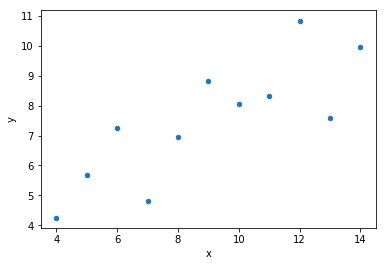

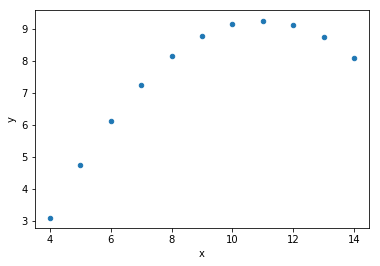

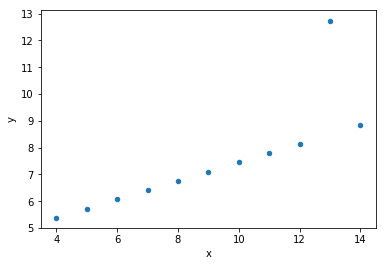

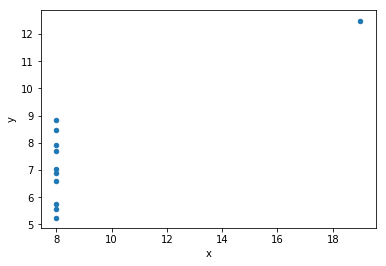

In [67]:
groups.plot(x='x', y='y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

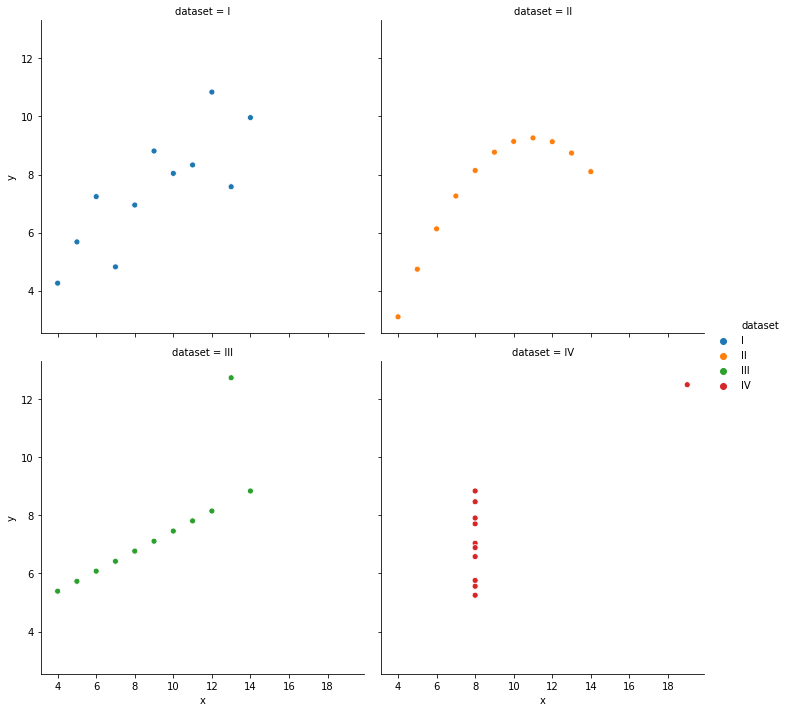

In [71]:
import seaborn as sns
sns.relplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, data=df);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

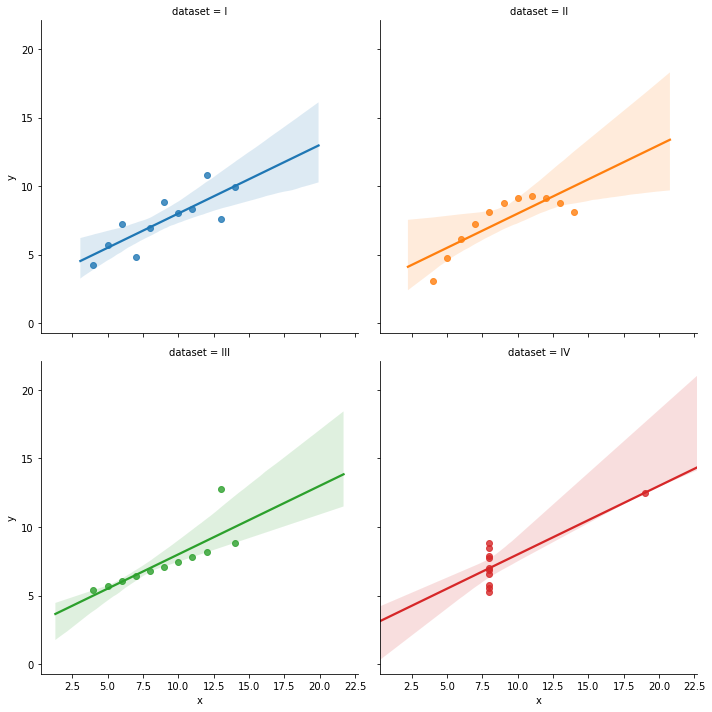

In [73]:
# lm = "Linear Model"
sns.lmplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, data=df);

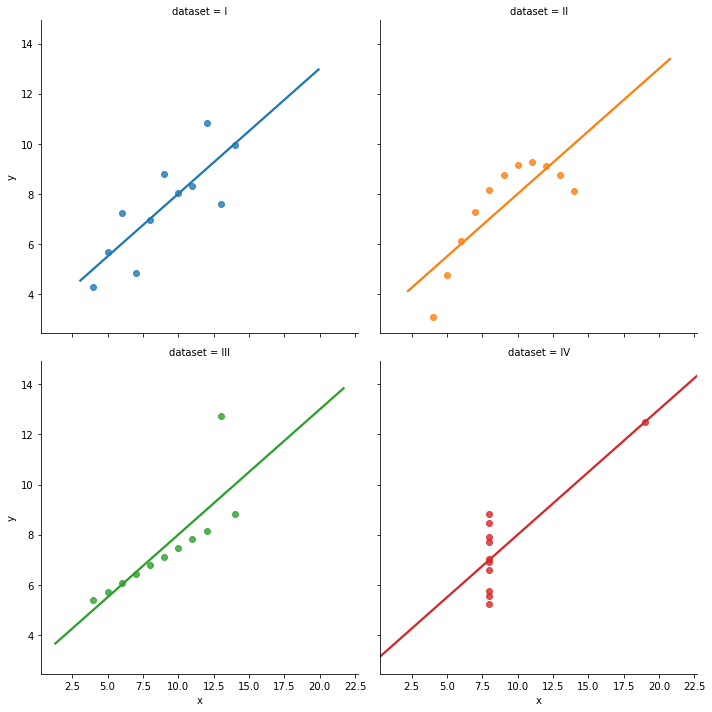

In [74]:
# removing line of best fit shade (confidence interval -- ci)
sns.lmplot('x', 'y', col='dataset', hue='dataset', col_wrap=2, ci=None, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [76]:
tips.shape

(244, 7)

### See the first 5 rows

In [81]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self, n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
    Returns a random sample of items from an axis of object.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : boolean, optional
        Sample with or without replacement. Default = False.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        weights of zero.
        If called on a DataFrame, will accept the name of a column
        when axis =

In [77]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [84]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [83]:
tips.describe(exclude=[np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

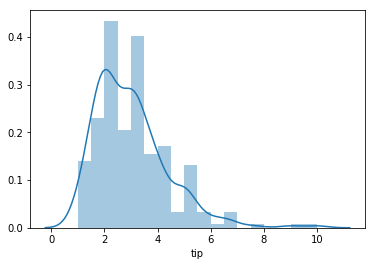

In [86]:
# Distribution plot of tips
sns.distplot(tips.tip);

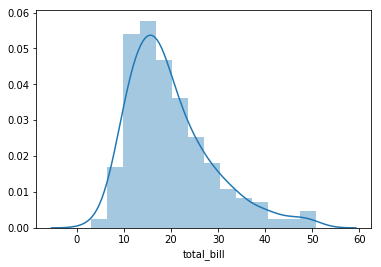

In [89]:
# distribution plot of the 'total bill' column
# Since total bill caps at $50 then it's reasonable that tips cap at around $10
sns.distplot(tips.total_bill);

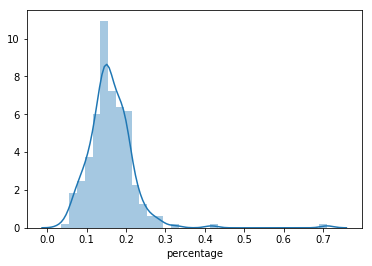

In [90]:
tips['percentage'] = tips.tip / tips.total_bill
sns.distplot(tips.percentage)

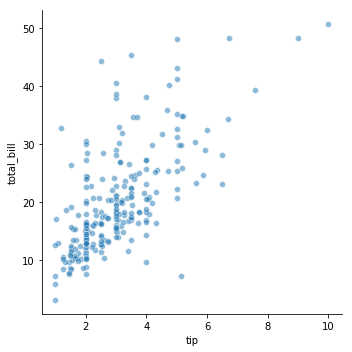

In [93]:
# Changing alpha in plot to see overlap in tips
sns.relplot('tip', 'total_bill', data=tips, alpha=.5);

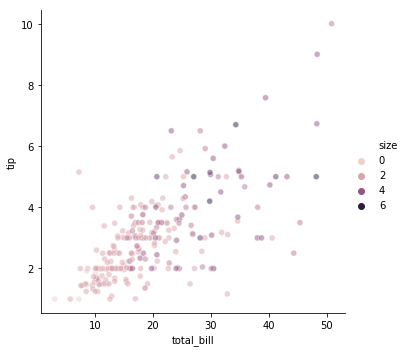

In [99]:
sns.relplot('total_bill', 'tip', data=tips, alpha=.5, hue='size');

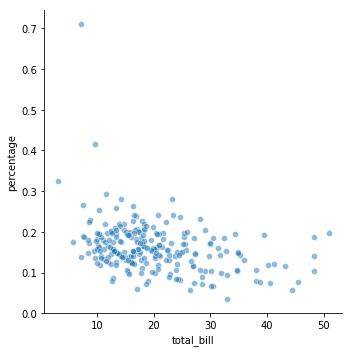

In [97]:
# as the bill changes how does the percentage tip change?
sns.relplot('total_bill', 'percentage', data=tips, alpha=.5);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [100]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

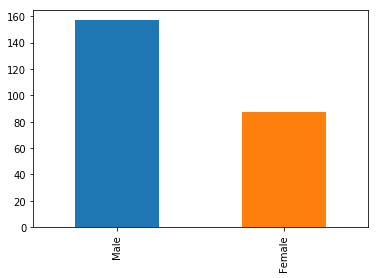

In [101]:
tips.sex.value_counts().plot.bar()

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

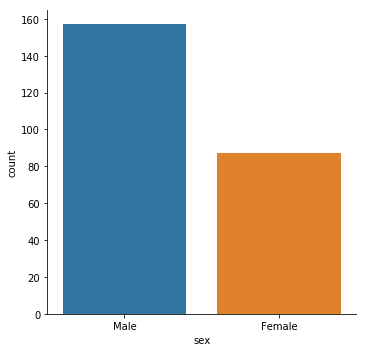

In [102]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

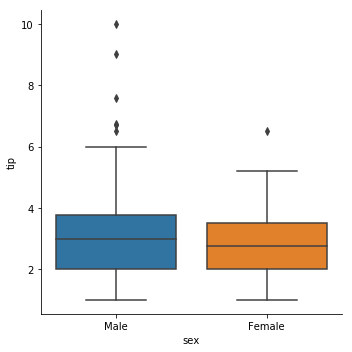

In [103]:
sns.catplot('sex', 'tip', data=tips, kind='box');

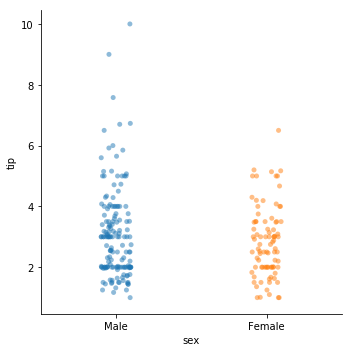

In [105]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=.5);

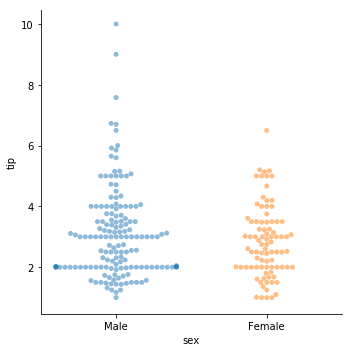

In [106]:
# all symetrically plotted
sns.catplot('sex', 'tip', data=tips, kind='swarm', alpha=.5);

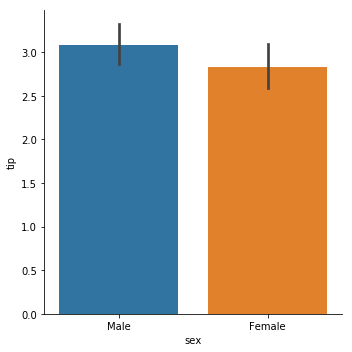

In [107]:
# Gives avg tip and error bars
# Error bars overlapping shows that there's not necessarilly much tip diff
# So be cautious about drawing difference between the two
sns.catplot('sex', 'tip', data=tips, kind='bar');

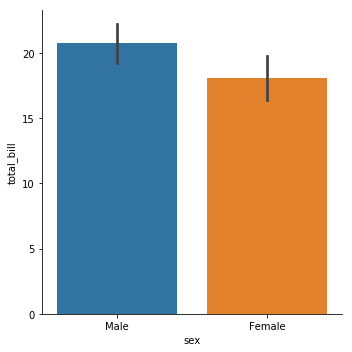

In [109]:
sns.catplot('sex', 'total_bill', data=tips, kind='bar');

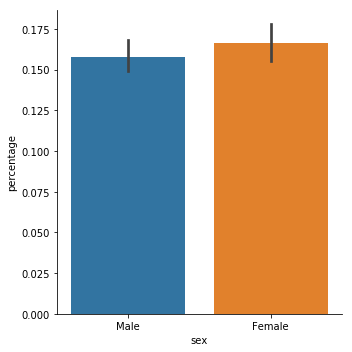

In [110]:
sns.catplot('sex', 'percentage', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [112]:
flights.shape

(144, 3)

### See the first 5 rows

In [116]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [115]:
flights.sample(10)

,year,month,passengers
118,1958,November,310
138,1960,July,622
117,1958,October,359
5,1949,June,135
79,1955,August,347
56,1953,September,237
24,1951,January,145
107,1957,December,336
124,1959,May,420
31,1951,August,199


### Describe the data

In [117]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [118]:
flights.describe(exclude=[np.number])

,month
count,144
unique,12
top,December
freq,12


### Plot year & passengers

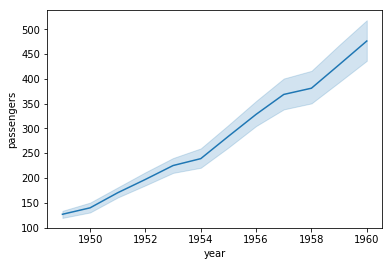

In [128]:
 # To remove confidence interval (shade) use -- ci=None
sns.lineplot('year', 'passengers', data=flights);

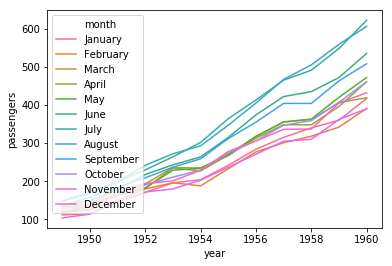

In [225]:
# Line plot with lines of passengers per month/year
# Summer months (blues) have higher number of passengers
sns.lineplot('year', 'passengers', hue='month', legend='brief', data=flights);

### Plot month & passengers

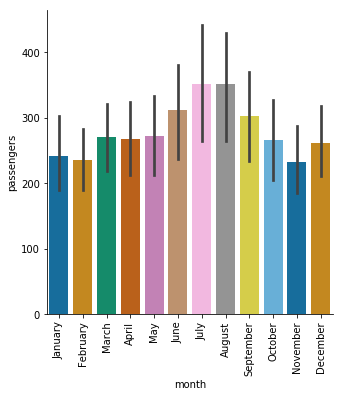

In [219]:
# Categorical (by month) bar plot
# Don't know yet how to expand x-axis to fit labels (months)
sns.catplot('month', 'passengers', data=flights,
            palette='colorblind', kind='bar')
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [203]:
# Increasing maximum rows to display
pd.set_option('display.max_rows', 500)

# Pivot table method 1
#flights_pivot = pd.pivot_table(flights, values='passengers', index='month', columns='year')

# Pivot table method 2
flights_pivot = flights.pivot('month', 'year', 'passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

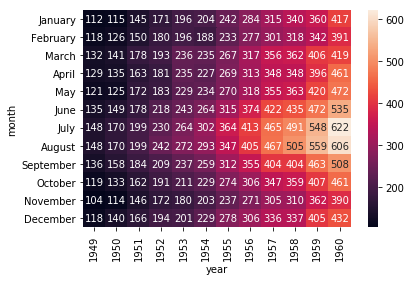

In [164]:
# Seems like number of passengers have increased as years go by
# Also higher travel season is around summer months
ax = sns.heatmap(flights_pivot, annot=True, fmt='d');